#### Loading the dataset

In [ ]:
#Loading the parkisnons.csv dataset
import pandas as pd

data = pd.read_csv('parkinsons.csv')
data.head()

,age,sex,test_time,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,Shimmer,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE,target
0,0.815695,-0.682509,-1.632090,0.082905,-0.284242,0.327453,-0.028637,0.328505,-0.324594,-0.351642,-0.209709,-0.423356,-0.543466,-0.209704,-0.298721,-0.009205,-1.214066,-1.478500,-0.650658,34.398
1,0.815695,-0.682509,-1.500676,-0.560793,-0.756723,-0.533746,-0.476212,-0.534825,-0.534016,-0.573156,-0.545158,-0.565592,-0.529955,-0.545153,-0.351965,1.282650,-1.055119,-1.247880,-1.218585,34.894
2,0.815695,-0.682509,-1.369410,-0.238944,-0.539382,-0.300038,-0.320767,-0.298983,-0.669115,-0.564469,-0.741592,-0.702426,-0.645545,-0.741587,-0.199370,0.318711,-0.784860,-1.540139,-0.103280,35.389
3,0.815695,-0.682509,-1.257773,-0.155370,-0.485186,-0.344859,-0.170682,-0.344871,-0.423692,0.069668,-0.460540,-0.449763,-0.392849,-0.460787,-0.071754,0.644530,-0.536487,-1.062115,1.237075,35.810
4,0.815695,-0.682509,-1.108169,-0.498557,-0.663894,-0.658604,-0.529814,-0.659682,-0.658276,-0.586186,-0.783145,-0.651413,-0.464905,-0.783392,-0.343370,1.036305,-0.689195,-1.297953,-0.283954,36.375


In [ ]:
#Ensuring no missing values
data.isnull().sum()

,0
age,0
sex,0
test_time,0
Jitter(%),0
Jitter(Abs),0
Jitter:RAP,0
Jitter:PPQ5,0
Jitter:DDP,0
Shimmer,0
Shimmer(dB),0


In [ ]:
#Choosing indepedent and dependent variables
X = data.drop('target',axis='columns')
y = data['target']

#### Problem 5

In [ ]:
#Training the linear regression and MLP (with and without activation functions)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error

#LinearRegression
lr_mae = []
for i in range(1,11):
  lr = LinearRegression()
  X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=i)
  lr.fit(X_train, y_train)
  y_pred = lr.predict(X_test)
  lr_mae.append(mean_absolute_error(y_test, y_pred))


#MLP with no activation function
mlp_no_mae = []
for i in range(1,11):
  mlp_no = MLPRegressor(hidden_layer_sizes=(10,10), activation='identity', random_state=0)
  X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=i)
  mlp_no.fit(X_train, y_train)
  y_pred = mlp_no.predict(X_test)
  mlp_no_mae.append(mean_absolute_error(y_test, y_pred))

#MLP with ReLU activation function
mlp_relu_mae = []
for i in range(1,11):
  mlp_relu = MLPRegressor(hidden_layer_sizes=(10,10), activation='relu', random_state=0)
  X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=i)
  mlp_relu.fit(X_train, y_train)
  y_pred = mlp_relu.predict(X_test)
  mlp_relu_mae.append(mean_absolute_error(y_test, y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

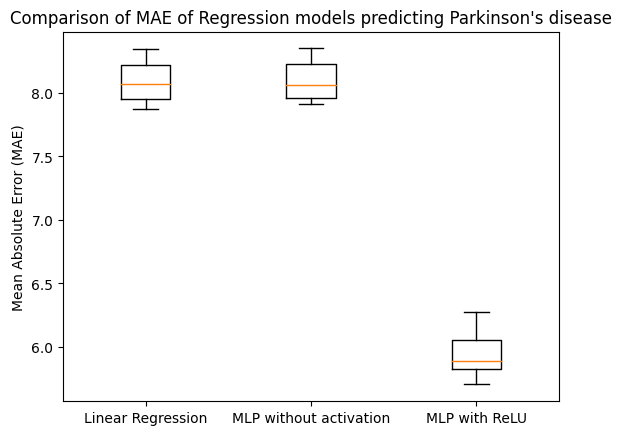

In [ ]:
#Plotting the boxplot of each model's MAE:
import matplotlib.pyplot as plt

plt.boxplot([lr_mae, mlp_no_mae, mlp_relu_mae])
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('Comparison of MAE of Regression models predicting Parkinson\'s disease')
plt.xticks([1, 2, 3], ['Linear Regression', 'MLP without activation', 'MLP with ReLU'])

plt.show()

#### Problem 6

The boxplot shows the Linear Regression model and the MLP with no activation achieved very similar mean absolute errors of around 8, while the MLP with ReLU activation achieved a better MAE of around 6. The Linear Regression model and the MLP without activation likely achieved similar results, as both are linear models (they only represent linear functions and are only able to devise linear patterns between the input and output). The MLP without activation is only able to represent the output as a linear function of the input because it only composes linear activation functions in each layer (in this case the identity function). The MLPs with nonlinear activation functions, such as ReLU, sigmoid or hyperbolic tangent, can represent nonlinear functions and thus devise nonlinear patterns in the data. The lower mean absolute error achieved by the MLP with ReLU in our dataset suggests that the dataset has nonlinear patterns.

#### Problem 7

In [ ]:
from sklearn.model_selection import train_test_split

X = data.drop('target',axis='columns')
Y = data['target']
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.8, random_state=0)



In [ ]:
from sklearn.neural_network import MLPRegressor
import itertools

MLP = MLPRegressor(hidden_layer_sizes=(10,10))

parameter_grid = {
    'alpha': [0.0001,0.001,0.01],
    'learning_rate_init': [0.001,0.01,0.1],
    'batch_size': [32,64,128],
 }

keys = parameter_grid.keys()
values = parameter_grid.values()

combinations = list(itertools.product(*values))

all_combinations = [dict(zip(keys, combination)) for combination in combinations]



In [ ]:
from sklearn.metrics import mean_absolute_error

results = []

for i,params in enumerate(all_combinations):
    print(i)
    MLP.set_params(**params)
    #fit over training data
    MLP.fit(X_train,y_train)

    #predict
    y_pred = MLP.predict(X_test)

    # Calculate MAE
    mae = mean_absolute_error(y_test, y_pred)

    # Store the result
    results.append({
        'alpha': params['alpha'],
        'learning_rate_init': params['learning_rate_init'],
        'batch_size': params['batch_size'],
        'MAE': mae
    })

resultsdf = pd.DataFrame(results)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

batch_size = [32,64,128]
for b in batch_size:
    #
    newdf = resultsdf[resultsdf['batch_size'] == b]

    pivot_table = newdf.pivot_table(values='MAE', index='alpha', columns='learning_rate_init')

    fig = plt.figure(figsize=(10, 7))

    # Heatmap plot
    sns.heatmap(pivot_table, annot=True, fmt=".2f", cmap='viridis',cbar = False, vmin = 3.67, vmax = 6.49,
            cbar_kws={'label': 'Mean Absolute Error (MAE)'})
    plt.xlabel('Learning Rate ')
    plt.ylabel('L2 Penalty')
    plt.xticks(range(len(parameter_grid['learning_rate_init'])), parameter_grid['learning_rate_init'])
    plt.yticks(range(len(parameter_grid['alpha'])), parameter_grid['alpha'])
    plt.title('MAE Heatmap (batch_size = {})'.format(b))
    plt.tight_layout()
    plt.show()